In [1]:
from b_tools.preprocess import get_standardized_measures

In [2]:
seq = get_standardized_measures('results/sequential_100.csv')
seq_time_tot = seq['TOTAL'].mean()

In [3]:
data = get_standardized_measures('results/thr_100.csv', excluded_columns=['P_DEGREE'])

In [4]:
data

,P_DEGREE,READING,HUFFBUILD,TOTAL
0,1,118618315,72173,118690488
1,1,117072934,65403,117138337
2,1,116404691,64240,116468931
3,1,116741808,63131,116804939
4,1,116479063,69482,116548545
...,...,...,...,...
95,20,11007495,70630,11078125
96,20,10715024,68891,10783915
97,20,10407845,68831,10476676
98,20,10716771,69094,10785865


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

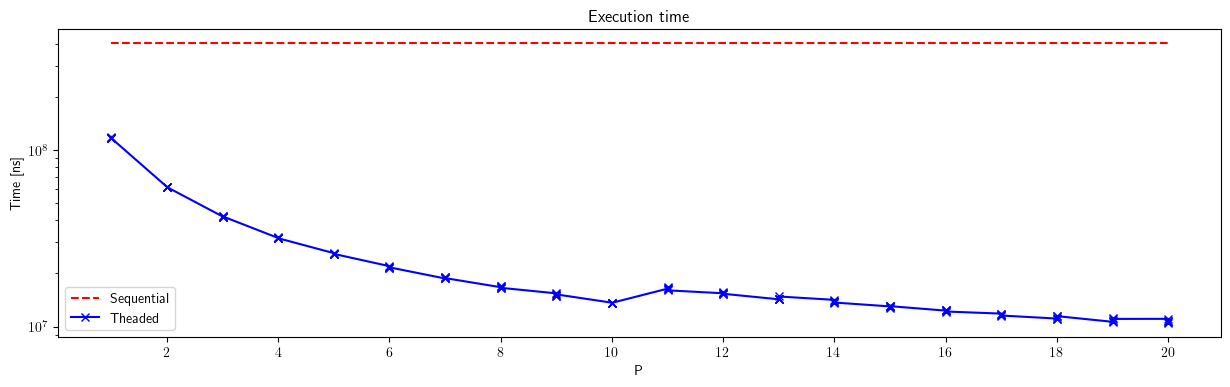

In [6]:
# setting up the plot
plt.figure(figsize=(15,4))
plt.title('Execution time')
plt.xticks(range(0, len(data['P_DEGREE']), 2))
plt.xlabel("P")
plt.ylabel("Time [ns]")
plt.yscale('log')
# sequential
plt.plot(data['P_DEGREE'], [seq_time_tot for _ in range(len(data['P_DEGREE']))], '--r')
# parallel
plt.plot(data['P_DEGREE'], data['TOTAL'], 'x-b')

plt.legend(['Sequential', 'Theaded'])
plt.show()

# Outlier detection and mean

Here we remove the outliers for the data and we compute the mean

In [7]:
import pandas as pd

In [8]:
# compute the mean for each group
sp_data = data.groupby('P_DEGREE', as_index=False).mean()

In [9]:
sp_data

,P_DEGREE,READING,HUFFBUILD,TOTAL
0,1,117063362.2,66885.8,117130248.0
1,2,61725425.8,67878.6,61793304.4
2,3,41864043.6,67260.8,41931304.4
3,4,31743807.8,68436.2,31812244.0
4,5,25756588.2,67862.6,25824450.8
5,6,21644096.8,68448.8,21712545.6
6,7,18855317.2,68976.2,18924293.4
7,8,16682084.6,69116.6,16751201.2
8,9,15016274.4,67564.0,15083838.4
9,10,13538573.4,67689.6,13606263.0


# Speedup

Let's calculate the speedup $\frac{T_{seq}}{T(P)}$

In [10]:
sp_data['S_p'] = sp_data['TOTAL'].map(lambda x: seq_time_tot / x)

In [11]:
sp_data

,P_DEGREE,READING,HUFFBUILD,TOTAL,S_p
0,1,117063362.2,66885.8,117130248.0,3.434067
1,2,61725425.8,67878.6,61793304.4,6.509332
2,3,41864043.6,67260.8,41931304.4,9.592670
3,4,31743807.8,68436.2,31812244.0,12.643973
4,5,25756588.2,67862.6,25824450.8,15.575671
5,6,21644096.8,68448.8,21712545.6,18.525380
6,7,18855317.2,68976.2,18924293.4,21.254857
7,8,16682084.6,69116.6,16751201.2,24.012197
8,9,15016274.4,67564.0,15083838.4,26.666498
9,10,13538573.4,67689.6,13606263.0,29.562353


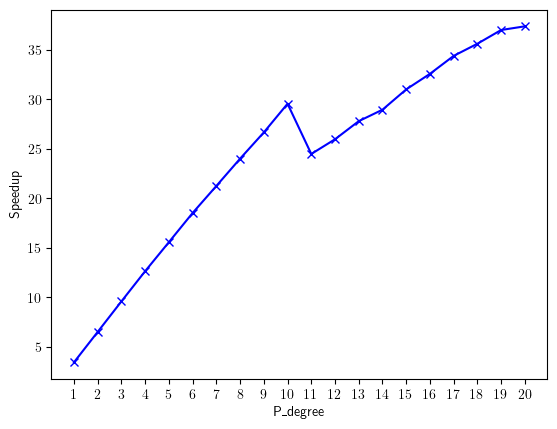

In [12]:
# plot results
plt.xticks(sp_data['P_DEGREE'])
plt.xlabel('P_{degree}')
plt.ylabel('Speedup')

plt.plot(sp_data['P_DEGREE'], sp_data['S_p'], 'x-b')

# Scalability

Compute the scalability that is $S_n=\frac{T(1)}{T(N)}$

In [13]:
time_n0 = sp_data[sp_data['P_DEGREE'] == 1]['TOTAL']
time_n0

0    117130248.0
Name: TOTAL, dtype: float64

In [14]:
sp_data['S_c'] = sp_data['TOTAL'].map(lambda x: time_n0 / x)

/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


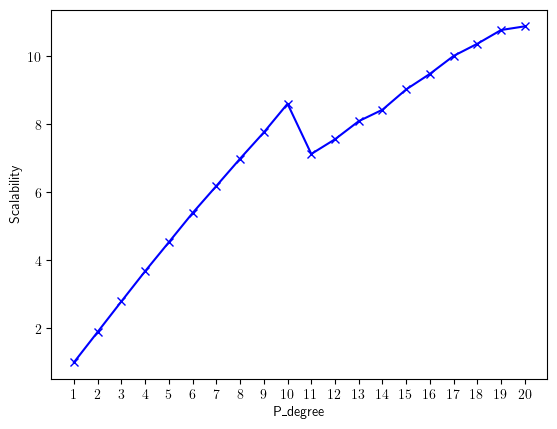

In [15]:
# plot results
plt.xticks(sp_data['P_DEGREE'])
plt.xlabel('P_{degree}')
plt.ylabel('Scalability')

plt.plot(sp_data['P_DEGREE'], sp_data['S_c'], 'x-b')